In [10]:
train_df <- read.csv("../Data/Titanic_train.csv")
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [11]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [12]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


### 컬럼 내용 확인
- Survived : 생존여부, 0= 사망, 1= 생존
- Pclass : 티켓등급, 1=1등급, 2=2등급, 3=3등급
- SibSp : 함께 탑승한 형제, 자매, 배우자의 수 (sibling)
- Parch : 함께 탑승한 부모, 자식의 수 (Parent Children)
- Fare : 운임
- Cabin : 객실 번호
- Embarked : 탑승항구, C=Chersbourg, Q=Queenstown, S=Southampton


In [19]:
# 각 컬럼별 NA 확인
sum(is.na(train_df)) 
colSums(is.na(train_df)) # 컬럼별 Sum 하는 함수

[1] 177

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [21]:
177/891 
# age는 아기에 대해서 관대하게 살렸으니 쓸모가 있는 컬럼이다.
#20% NA라 쓸만하다, 그러나 연결된 데이터가 없어서 채울 수가 없다.
# 그래서 177개를 뺴고 쓸 것인가.


[1] 0.1986532

In [41]:
# train_df$Age가 NA인 것 뺴고 데이터셋 만들기
head(train_df[!is.na(train_df$Age),])
nrow(train_df[!is.na(train_df$Age),])

#subset(train_df , !is.na(Age))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S


[1] 714

In [45]:
# Survived 기준으로 Dataset 정렬
library(dplyr)
train_df<- arrange(train_df, Survived)



In [48]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [49]:
# 정렬된 크기 확인하기
dim(train_df)

[1] 891  12

#Target Column : Survived 분석 및 확인
--

In [50]:
table(train_df$Survived)


  0   1 
549 342 

In [63]:
# Survived의 생존과 사망 Count 확인
# 사망자수
nrow(subset(train_df,Survived == 0))
#table(train_df$Survived)[1]
# 생존자수
nrow(subset(train_df,Survived == 1))
#table(train_df$Survived)[2]
# 생존자수의 비율
nrow(subset(train_df,Survived == 1)) / nrow(train_df)
#table(train_df$Survived)[2]/(table(train_df$Survived)[1]+table(train_df$Survived)[2])

[1] 549

[1] 342

[1] 0.3838384

In [ ]:
# 타켓의 비율은 일정한 것이 좋지만, 피처의 비율은 다른 것이 좋다.

In [86]:
# 생존과 사망 비율을 Pie Chart로 생성
library(plotrix)

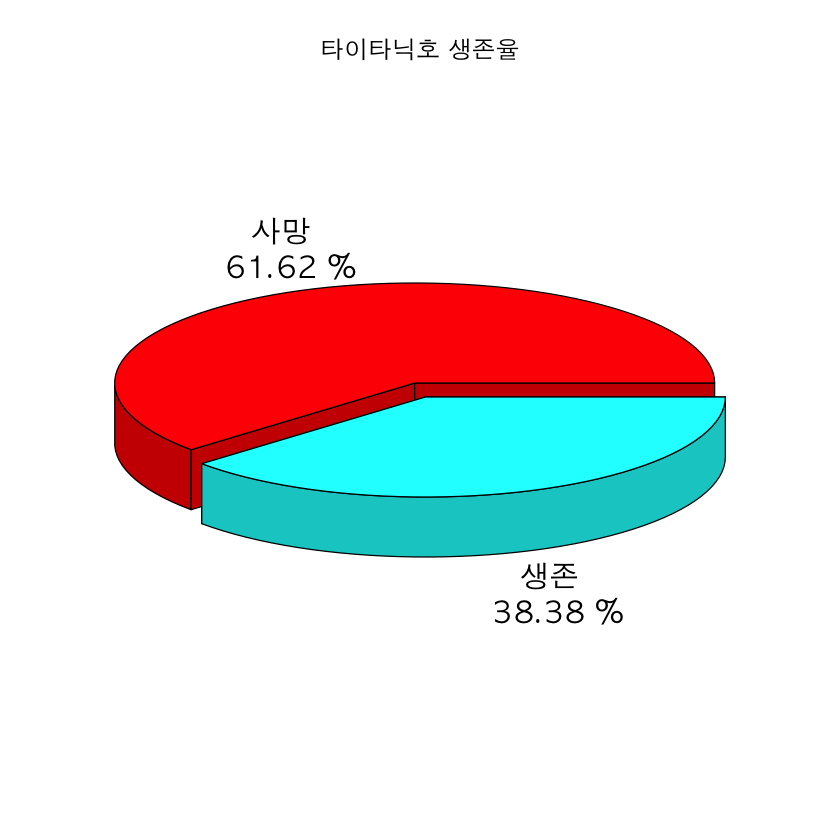

In [85]:
par(family = "AppleGothic")
options(warn = -1)
ratio = c(round(nrow(subset(train_df,Survived == 0)) / nrow(train_df) *100,2),
          round(nrow(subset(train_df,Survived == 1)) / nrow(train_df) *100,2)
         )
label = paste(c("사망","생존") ,"\n",ratio, "%")


pie3D(
        c(nrow(subset(train_df,Survived == 0)),nrow(subset(train_df,Survived == 1))),
        main = "타이타닉호 생존율",
        labels = label,
        explode = 0.05,
        labelcex = 1.5
        )

In [89]:
# 처음부터 5:5 로 맞춰서하기보단 6:4면 데이터량이있으니 그대로해본다음 맞춰서해보는 게 낫다 


[1] 891

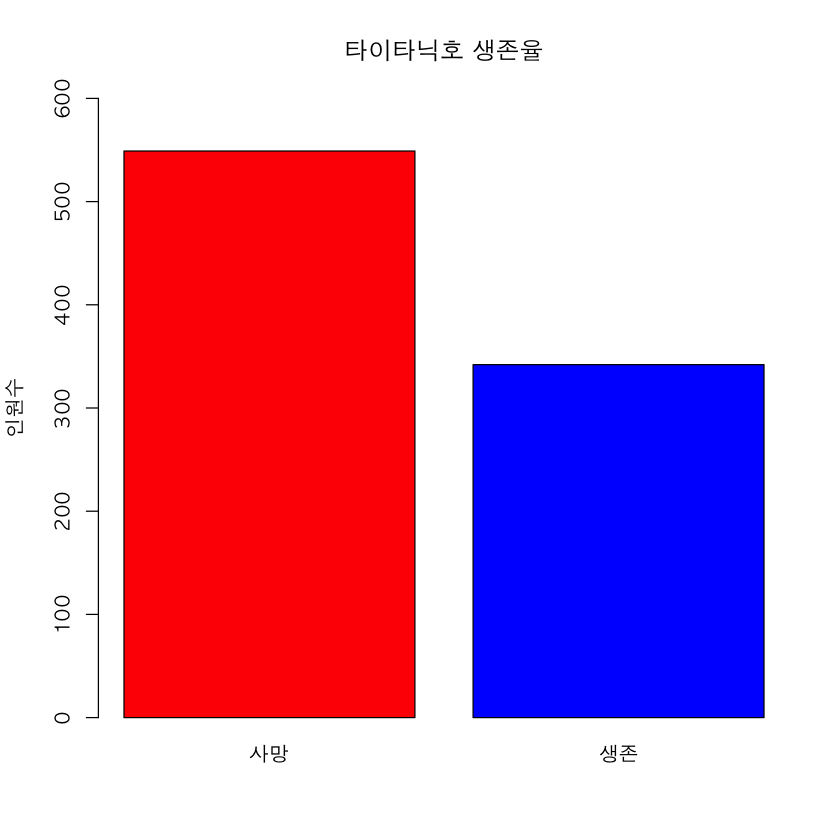

In [100]:
SurvDeath<- c(nrow(subset(train_df,Survived == 0)),nrow(subset(train_df,Survived == 1)))
names(SurvDeath) <- c("사망","생존")

par(family = "AppleGothic")
options(warn = -1)
barplot(
        SurvDeath,
        main = "타이타닉호 생존율",
        col = c("red","blue"),
        ylim = c(0,600),
        ylab = "인원수",
        )



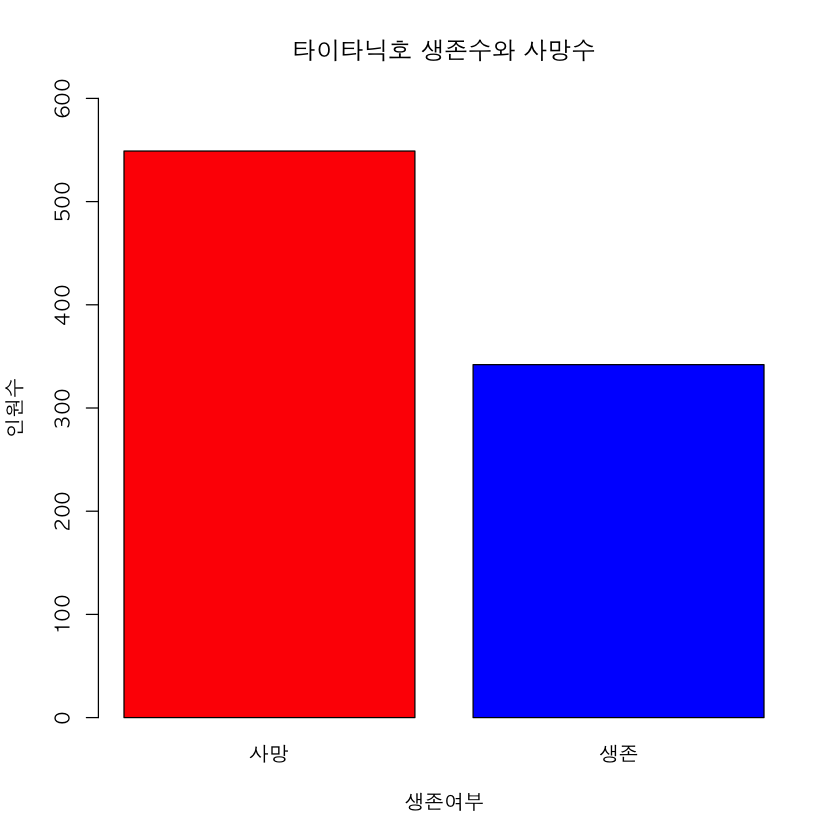

In [103]:
# barplot 은 table과 친하다
par(family = "AppleGothic")
options(warn = -1)
barplot(
        table(train_df$Survived),
        main = "타이타닉호 생존수와 사망수",
        col = c("red","blue"),
        ylim = c(0,600),
        xlab = "생존여부",
        ylab = "인원수",
        names = c("사망", "생존")
        )

> Target Column으로 Survived를 선정 

---
# Feature column 찾기

In [104]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


In [ ]:
#피처 컬럼은 연관성을 본 컬럼 중 데이터 종류 수가 작은 것부터 하는 게 좋다.

### Sex컬럼 확인

In [106]:
# Sex 컬럼 분류 확인
unique(train_df$Sex)

[1] male   female
Levels: female male

In [113]:
# 여성과 남성의 인원 확인
femaleCount <- sum(train_df$Sex == "female"); femaleCount
maleCount <- sum(train_df$Sex == "male"); maleCount

[1] 314

[1] 577

In [119]:
# 여성의 생존수와 사망수
femaleSurvived <- sum(train_df$Sex == "female" & train_df$Survived == 1); femaleSurvived
femaleDeath <- sum(train_df$Sex == "female" & train_df$Survived == 0); femaleDeath

[1] 233

[1] 81

In [120]:
# 남성의 생존수와 사망수
maleSurvived <- sum(train_df$Sex == "male" & train_df$Survived == 1); maleSurvived
maleDeath <- sum(train_df$Sex == "male" & train_df$Survived == 0); maleDeath

[1] 109

[1] 468

In [139]:
# 여성의 생존율과 사망률

femaleSurvivedRatio<-round(femaleSurvived/ femaleCount * 100,2)
femaleDeathRatio<- round(femaleDeath/ femaleCount * 100,2)

maleSurvivedRatio<-round(maleSurvived/ maleCount * 100,2)
maleDeathRatio<-round(maleDeath/ maleCount * 100,2)

cat("여성의 생존률 : ",femaleSurvivedRatio,"%\n여성의 사망률 : ",femaleDeathRatio,"%\n", sep = "")
cat("남성의 생존률 : ",maleSurvivedRatio,"%\n남성의 사망률 : ",maleDeathRatio,"%\n", sep = "")

여성의 생존률 : 74.2%
여성의 사망률 : 25.8%
남성의 생존률 : 18.89%
남성의 사망률 : 81.11%


>Sex 컬럼 feature 컬럼으로 적합  
> [Survived] <- [Sex]

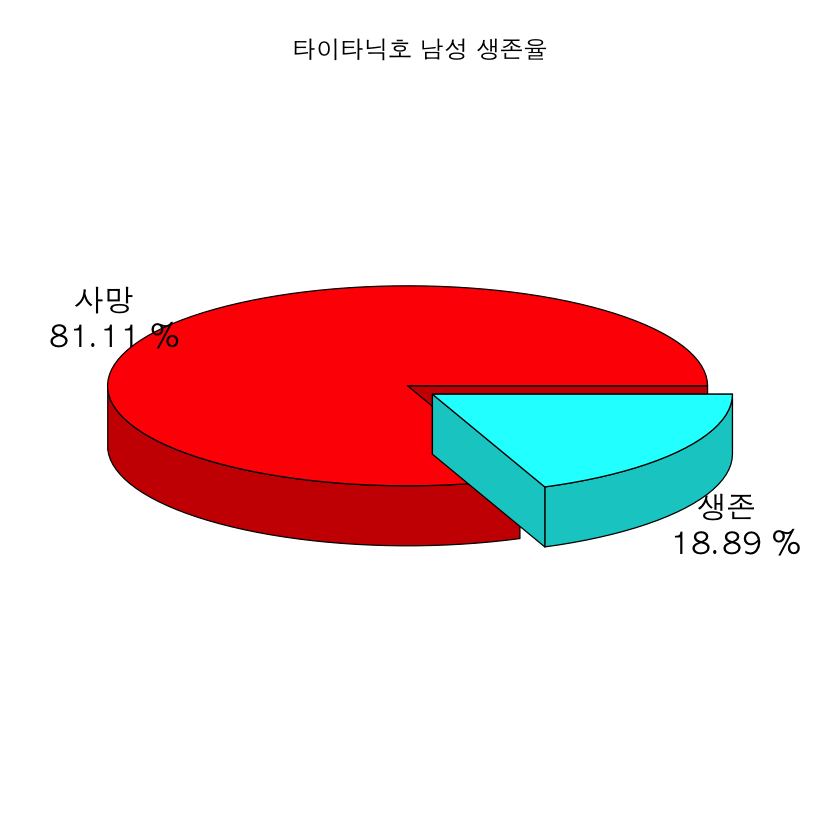

In [161]:
par(family = "AppleGothic")
options(warn = -1)
#par(mflow = c(2,2))


label = paste(c("사망","생존") ,"\n",c(maleDeathRatio,maleSurvivedRatio), "%")


pie3D(
        c(maleDeathRatio,maleSurvivedRatio),
        main = "타이타닉호 남성 생존율",
        labels = label,
        explode = 0.05,
        labelcex = 1.5
        )



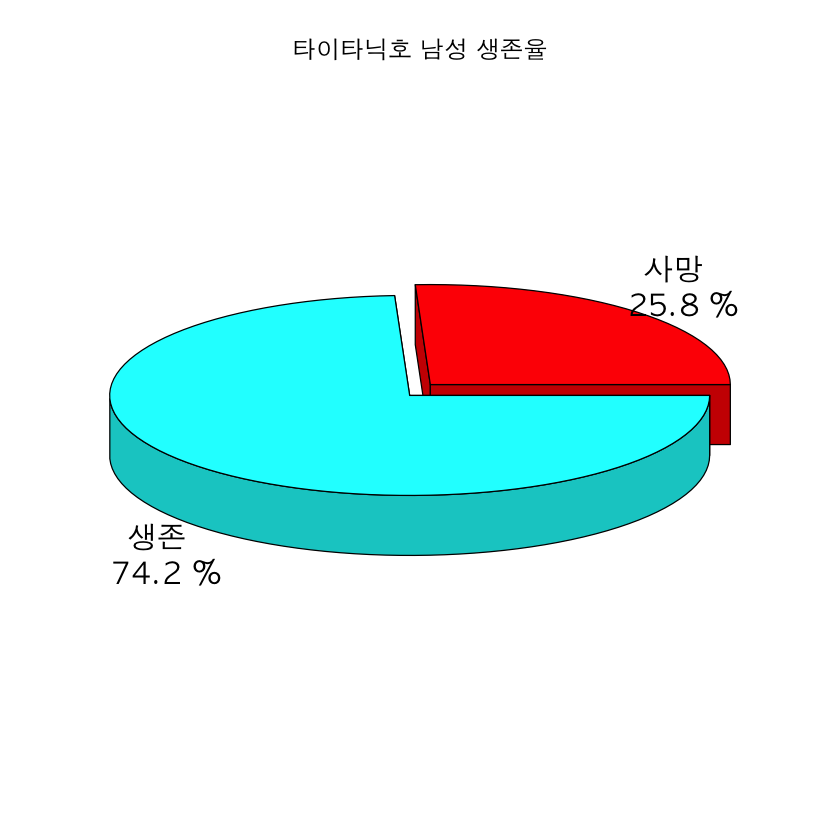

In [149]:
par(family = "AppleGothic")
options(warn = -1)


label = paste(c("사망","생존") ,"\n",c(femaleDeathRatio,femaleSurvivedRatio), "%")


pie3D(
        c(femaleDeathRatio,femaleSurvivedRatio),
        main = "타이타닉호 남성 생존율",
        labels = label,
        explode = 0.05,
        labelcex = 1.5
        )

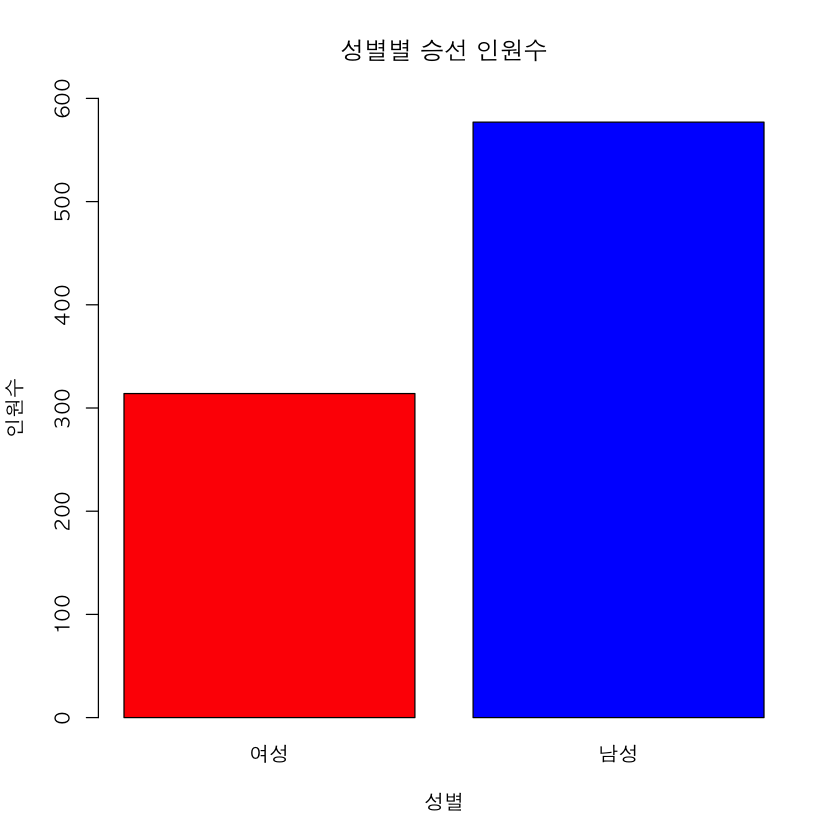

In [159]:
par(family = "AppleGothic")
options(warn = -1)
barplot(
        table(train_df$Sex),
        main = "성별별 승선 인원수",
        col = c("red","blue"),
        ylim = c(0,600),
        xlab = "성별",
        ylab = "인원수",
        names = c("여성", "남성")
        )

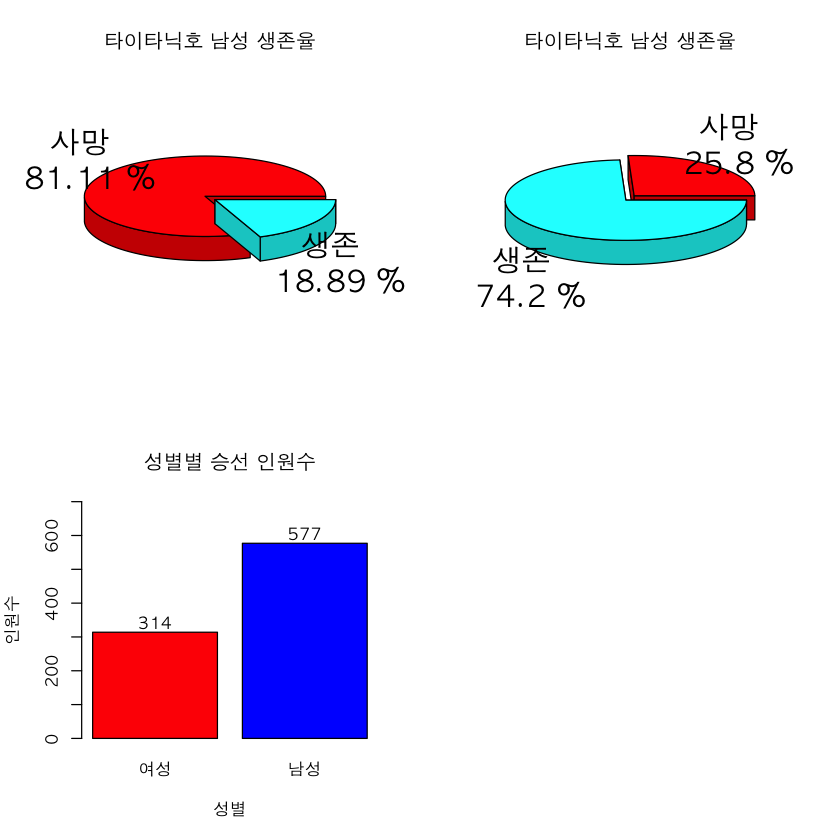

In [177]:
par(family = "AppleGothic")
options(warn = -1)
par(mfrow = c(2,2))


label = paste(c("사망","생존") ,"\n",c(maleDeathRatio,maleSurvivedRatio), "%")


pie3D(
        c(maleDeathRatio,maleSurvivedRatio),
        main = "타이타닉호 남성 생존율",
        labels = label,
        explode = 0.05,
        labelcex = 1.5
        )

label = paste(c("사망","생존") ,"\n",c(femaleDeathRatio,femaleSurvivedRatio), "%")


pie3D(
        c(femaleDeathRatio,femaleSurvivedRatio),
        main = "타이타닉호 남성 생존율",
        labels = label,
        explode = 0.05,
        labelcex = 1.5
        )

barplot(
        table(train_df$Sex),
        main = "성별별 승선 인원수",
        col = c("red","blue"),
        ylim = c(0,700),
        xlab = "성별",
        ylab = "인원수",
        names = c("여성", "남성")
        )

text(0.7,table(train_df$Sex)[1]+30,table(train_df$Sex)[1])
text(1.9,table(train_df$Sex)[2]+30,table(train_df$Sex)[2])

In [134]:
sum(train_df$Sex == "female" & train_df$Pclass == 1)/sum(train_df$Sex == "male" & train_df$Pclass == 1)
femaleCount/maleCount

[1] 0.7704918

[1] 0.5441941

In [146]:
class3female <- sum(train_df$Sex == "female" & train_df$Pclass == 3) ; class3female
class3male <- sum(train_df$Sex == "male" & train_df$Pclass == 3) ; class3male

class3femaleSurv <- sum(train_df$Sex == "female" & train_df$Pclass == 3 & train_df$Survived == 1); class3femaleSurv
class3maleSurv <- sum(train_df$Sex == "male" & train_df$Pclass == 3 & train_df$Survived == 1); class3maleSurv

[1] 144

[1] 347

[1] 72

[1] 47

In [150]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


In [160]:
aggregate(Parch ~ Sex+Survived+Pclass ,data=train_df, mean)

Sex,Survived,Pclass,Parch
female,0,1,1.3333333
male,0,1,0.2597403
female,1,1,0.4285714
male,1,1,0.3111111
female,0,2,0.1666667
male,0,2,0.1428571
female,1,2,0.6428571
male,1,2,0.6470588
female,0,3,1.0972222
male,0,3,0.2133333


In [ ]:
table(train_df[,])

In [242]:
arrange(train_df,Sex,Survived,Pclass)[80:170,]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
80,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.1250,,Q
81,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.4500,,S
82,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
83,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
84,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S
85,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NA,1,0,PC 17569,146.5208,B78,C
86,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49,1,0,PC 17572,76.7292,D33,C
87,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0000,B28,
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23,3,2,19950,263.0000,C23 C25 C27,S
89,137,1,1,"Newsom, Miss. Helen Monypeny",female,19,0,2,11752,26.2833,D47,S


In [188]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


---
### 티켓 등급 분석

In [192]:
table(train_df$Pclass)


  1   2   3 
216 184 491 

In [218]:
# 1등 객실 여성 생존율

survrateperlass <- 0

for( j in c("female","male")){
    for( i in 1:3) {
        class1Female <- sum(train_df$Sex == j & train_df$Pclass == i)
        class1FemaleSurv <-sum(train_df$Sex == j & train_df$Pclass == i & train_df$Survived == 1)
        cat(i,"등 객실의 ",ifelse(j == "female","여성","남성"),"생존율은 " , class1FemaleSurv,"/",class1Female ,",",round(class1FemaleSurv/class1Female * 100,2),"%\n"  )
        survrateperlass<- c(survrateperlass,round(class1FemaleSurv/class1Female * 100,2))
    }
    cat("--------------------------------------------------\n")
}
survrateperlass <- survrateperlass[-1]

1 등 객실의  여성 생존율은  91 / 94 , 96.81 %
2 등 객실의  여성 생존율은  70 / 76 , 92.11 %
3 등 객실의  여성 생존율은  72 / 144 , 50 %
--------------------------------------------------
1 등 객실의  남성 생존율은  45 / 122 , 36.89 %
2 등 객실의  남성 생존율은  17 / 108 , 15.74 %
3 등 객실의  남성 생존율은  47 / 347 , 13.54 %
--------------------------------------------------


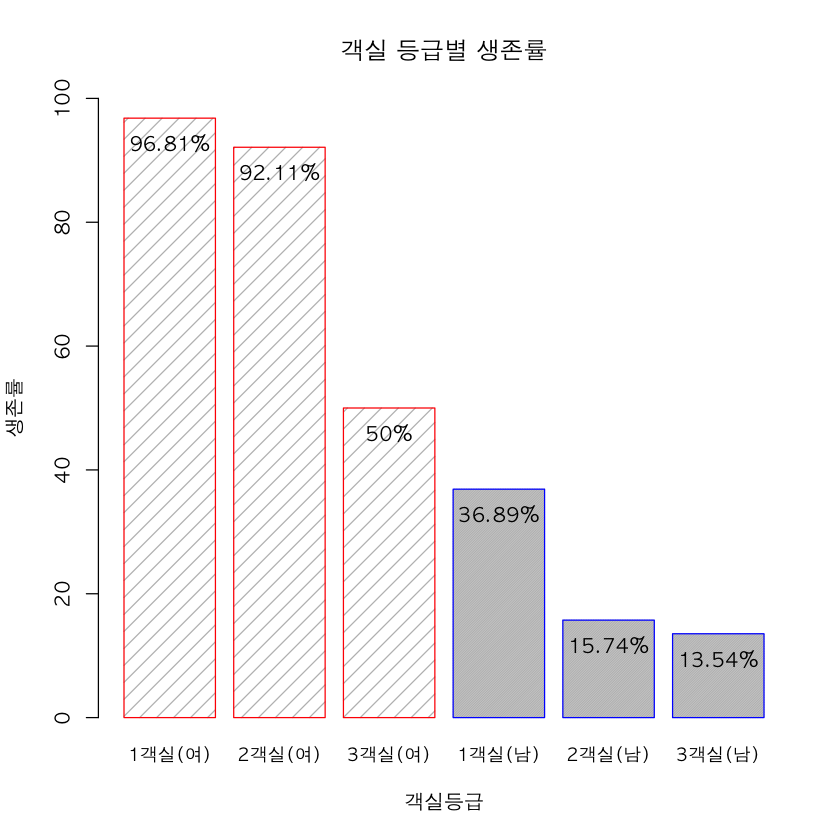

In [240]:
par(family = "AppleGothic")
options(warn = -1)

barplot(
        survrateperlass,
        main = "객실 등급별 생존률",
        col = c("gray"),
        ylim = c(0,100),
        xlab = "객실등급",
        ylab = "생존률",
        names = c("1객실(여)","2객실(여)","3객실(여)","1객실(남)","2객실(남)","3객실(남)"),
        cex.axis = 1,
        cex.names = 0.9,
        border = rep(c("red","blue"),each = 3),
        density = rep(c(10,100),each=3)
        )
for ( i in 1:6)
    text(i*1.2 -0.5,survrateperlass[i]-4, paste(survrateperlass[i],"%",sep=""))


In [241]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


> [Survived] <- [Sex,Pclass]

In [250]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


---
### Embarked(항구의 위치)

In [251]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


In [253]:
table(train_df$Embarked)


      C   Q   S 
  2 168  77 644 

In [260]:
unique(train_df$Embarked)

[1] S Q C  
Levels:  C Q S

In [261]:
# 빈칸의 데이터 찾기
train_df[train_df$Embarked == "",]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [263]:
# 제일 많은 운임을 지불한 사람
train_df[train_df$Fare == max(train_df$Fare),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
639,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,,C
814,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C
836,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C


In [264]:
mean(train_df$Fare)

[1] 32.20421

In [271]:
# 항구별 탑승인원을 구하여 가장 많은 탑승인원의 항구로 결정
# 가장 많은 사람이 타니까 거기서 탈 확률도 높기 때문
# S항구 탑승인원
sum(train_df$Embarked == "S")
# C항구 탑승인원
sum(train_df$Embarked == "C")
# Q항구 탑승인원
sum(train_df$Embarked == "Q")


[1] 644

[1] 168

[1] 77

>빈값 항구 S항구로 변경

In [283]:
# 연습을 위한 데이터셋 복제
train_df_T <- train_df

In [284]:
# 빈칸 항구 찾기 - 1
subset(train_df_T, Embarked == "") 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [285]:
# 빈칸 항구 찾기 - 2
train_df_T[train_df_T$Embarked == "",]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [286]:
# 빈칸 항구를 S항구로 변경 - 1
train_df_T$Embarked <- ifelse(train_df_T$Embarked == "", "S", train_df_T$Embarked)

In [295]:
train_df_T[c(577,868),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,S
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,S


In [298]:
# 빈칸 항구를 S항구로 변경 -2
train_df_T <- train_df
train_df_T[c(577,868),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [294]:
train_df_T[train_df_T$Embarked == "",]$Embarked <- "S"
train_df_T[c(577,868),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,S
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,S


In [297]:
# 빈칸 항구를 S항구로 변경 - 3
train_df_T <- train_df
train_df_T[c(577,868),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [299]:
train_df_T$Embarked[train_df_T$Embarked == ""] <- "S"

In [300]:
train_df_T[c(577,868),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,S
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,S


In [301]:
train_df$Embarked[train_df$Embarked == ""] <- "S"

In [302]:
train_df[c(577,868),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,S
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,S


In [303]:
sum(train_df$Embarked == "S")

[1] 646

In [305]:
train_df$Embarked <- factor(train_df$Embarked)

In [307]:
str(train_df$Embarked)

 Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...


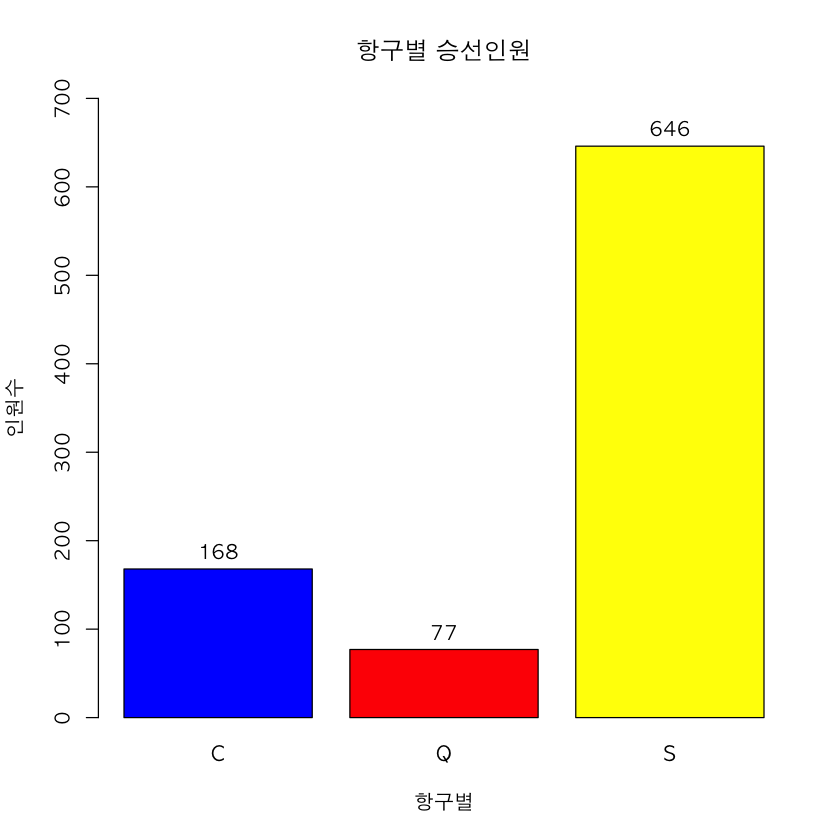

In [315]:
# 항구별 승선 인원
par(family = "AppleGothic")
options(warn = -1)

barplot(
        table(train_df$Embarked),
        main = "항구별 승선인원",
        col = c("blue","red","yellow"),
        ylim = c(0,700),
        xlab = "항구별",
        ylab = "인원수",
#        names = c("C","Q","S"),
        cex.axis = 1,
        cex.names = 1,
#        border = rep(c("red","blue"),each = 3),
#        density = rep(c(10,100),each=3)
        )

for(i in 1:length(table(train_df$Embarked)))
    text(1.2*i-0.5,table(train_df$Embarked)[i]+20,table(train_df$Embarked)[i])

In [316]:
table(train_df[c("Embarked","Sex")])

        Sex
Embarked female male
       C     73   95
       Q     36   41
       S    205  441

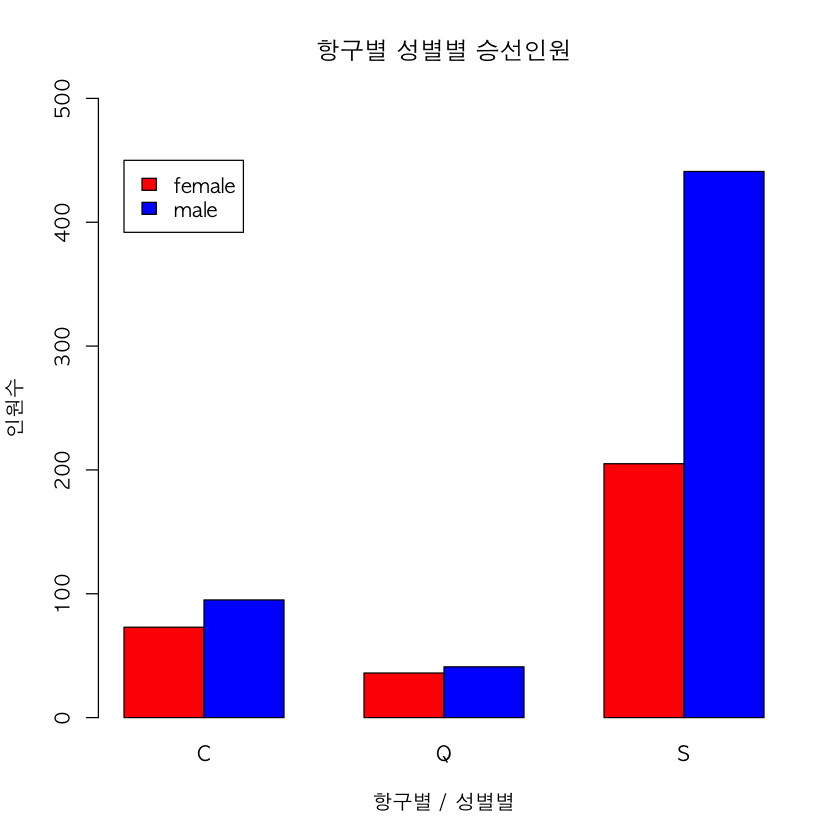

In [336]:
#항구별 승선 인원
#항구별 성별 
par(family = "AppleGothic")
options(warn = -1)

barplot(
        t(table(train_df[c("Embarked","Sex")])),
        main = "항구별 성별별 승선인원",
        beside = T,
        col = c("red","blue"),
        ylim = c(0,500),
        xlab = "항구별 / 성별별",
        ylab = "인원수",
#        names = c("C","Q","S"),

        cex.axis = 1,
        cex.names = 1,
#        border = rep(c("red","blue"),each = 3),
#        density = rep(c(10,100),each=3)
        )

legend(1,450,
      c("female","male"),
       fill = c("red","blue")
      )



# for(i in 1:length(table(train_df$Embarked)))
#     text(1.2*i-0.5,table(train_df$Embarked)[i]+20,table(train_df$Embarked)[i])

In [331]:
# plot 이 C Q 보다 S 가 월등히 크기때문에 S항구만 의미가 있으면 됨.
# S 항구에 성별비율 갭이 커서 쓸만하다


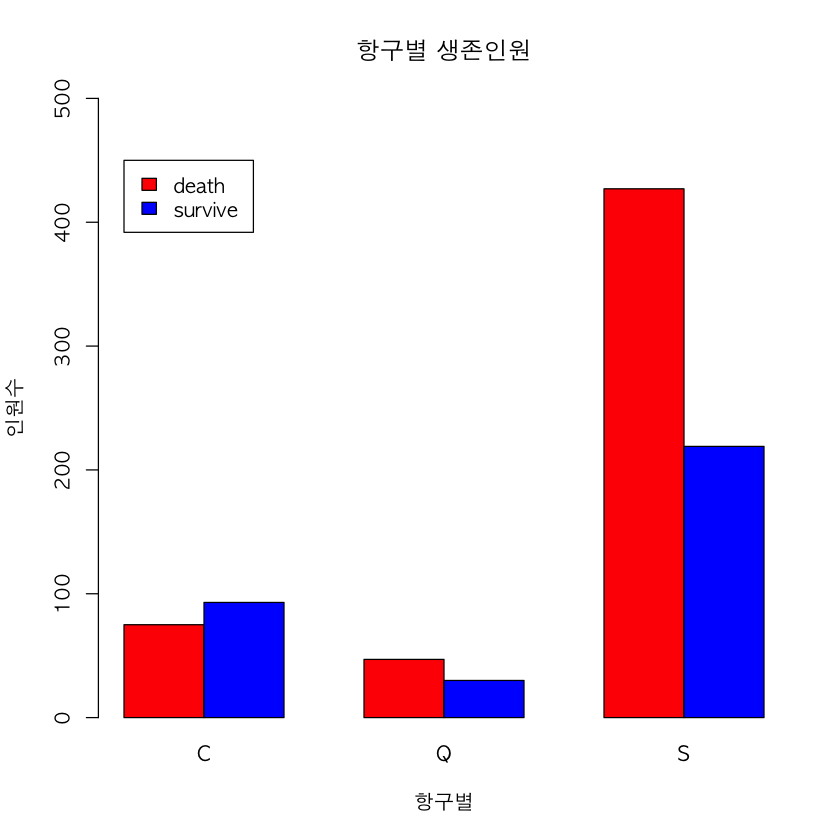

In [333]:
par(family = "AppleGothic")
options(warn = -1)

barplot(
        t(table(train_df[c("Embarked","Survived")])),
        main = "항구별 생존인원",
        beside = T,
        col = c("red","blue"),
        ylim = c(0,500),
        xlab = "항구별",
        ylab = "인원수",
        cex.axis = 1,
        cex.names = 1,
        )

legend(1,450,
       c("death","survive"),
       fill = c("red","blue")
      
      )

In [335]:
sum(train_df$Embarked == "S")/nrow(train_df)

[1] 0.7250281

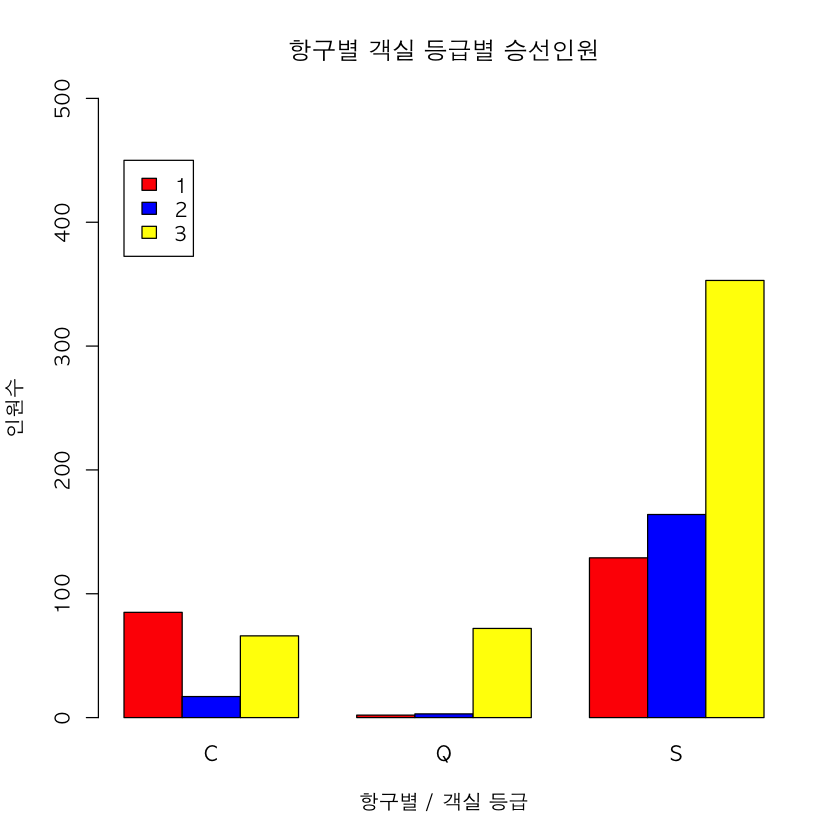

In [347]:
par(family = "AppleGothic")
options(warn = -1)

barplot(
        t(table(train_df[c("Embarked","Pclass")])),
        main = "항구별 객실 등급별 승선인원",
        beside = T,
        col = c("red","blue","yellow"),
        ylim = c(0,500),
        xlab = "항구별 / 객실 등급",
        ylab = "인원수",
#        names = c("C","Q","S"),

        cex.axis = 1,
        cex.names = 1,
#        border = rep(c("red","blue"),each = 3),
#        density = rep(c(10,100),each=3)
        )

legend(1,450,
      c(1,2,3),
       fill = c("red","blue","yellow")
      
      )

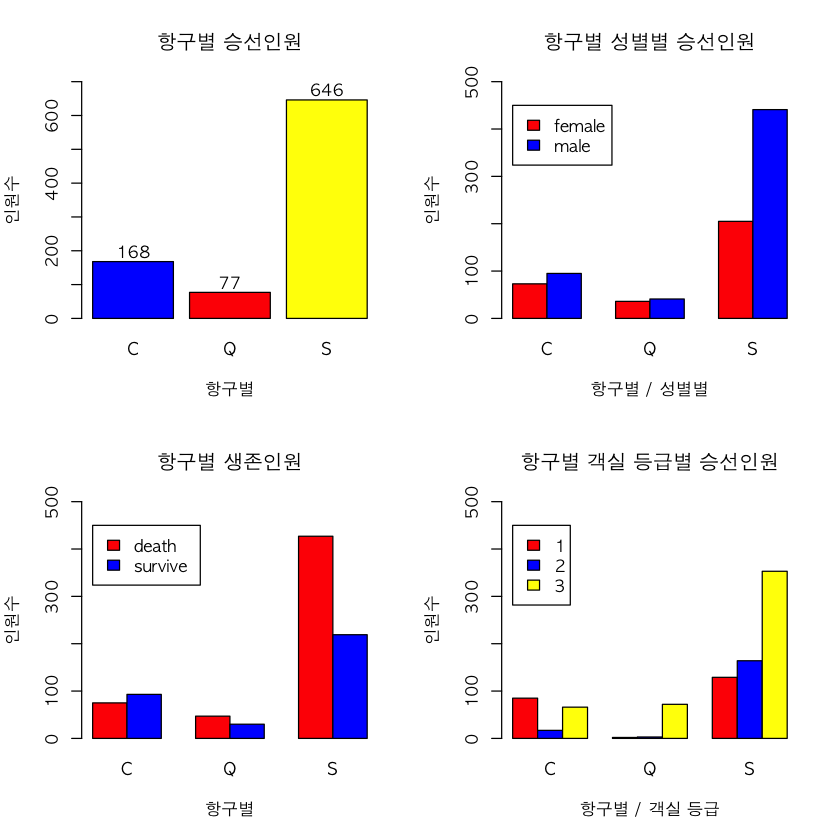

In [358]:
# 그래프 한눈에 보기
par(mfrow = c(2,2))
par(family = "AppleGothic")
options(warn = -1)

barplot(
        table(train_df$Embarked),
        main = "항구별 승선인원",
        col = c("blue","red","yellow"),
        ylim = c(0,700),
        xlab = "항구별",
        ylab = "인원수",
        )

for(i in 1:length(table(train_df$Embarked)))
    text(1.2*i-0.5,table(train_df$Embarked)[i]+30,table(train_df$Embarked)[i])
barplot(
        t(table(train_df[c("Embarked","Sex")])),
        main = "항구별 성별별 승선인원",
        beside = T,
        col = c("red","blue"),
        ylim = c(0,500),
        xlab = "항구별 / 성별별",
        ylab = "인원수",
        )

legend(1,450,
      c("female","male"),
       fill = c("red","blue")
      )

barplot(
        t(table(train_df[c("Embarked","Survived")])),
        main = "항구별 생존인원",
        beside = T,
        col = c("red","blue"),
        ylim = c(0,500),
        xlab = "항구별",
        ylab = "인원수",
        )
legend(1,450,
       c("death","survive"),
       fill = c("red","blue")
      )

barplot(
        t(table(train_df[c("Embarked","Pclass")])),
        main = "항구별 객실 등급별 승선인원",
        beside = T,
        col = c("red","blue","yellow"),
        ylim = c(0,500),
        xlab = "항구별 / 객실 등급",
        ylab = "인원수",
        )

legend(1,450,
      c(1,2,3),
       fill = c("red","blue","yellow")
      )


---
# RandomForest로 예측모델 생성

In [359]:
# 복사본
train_df_T <- train_df

In [363]:
# 예측을 위한 컬럼 확인
target_col <- c("Survived","Sex","Pclass","Embarked")
head(train_df_T[,target_col])

Survived,Sex,Pclass,Embarked
0,male,3,S
0,male,3,S
0,male,3,Q
0,male,1,S
0,male,3,S
0,male,3,S


In [367]:
# Sex 컬럼을 숫자로 전환
train_df_T$SexCode[train_df_T$Sex == "male"] <- 0
train_df_T$SexCode[train_df_T$Sex == "female"] <- 1


In [369]:
head(train_df_T)
tail(train_df_T)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S,0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C,1
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C,1
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C,1
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S,1
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,0


In [370]:
# Sex컬럼 삭제
train_df_T <- subset(train_df_T,select = -Sex)
head(train_df_T)

PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",20,0,0,A/5. 2151,8.0500,,S,0


In [373]:
target_col <- c("Survived","SexCode","Pclass","Embarked")
head(train_df_T[,target_col])

Survived,SexCode,Pclass,Embarked
0,0,3,S
0,0,3,S
0,0,3,Q
0,0,1,S
0,0,3,S
0,0,3,S


# Embarked를 숫자로 전환 
C = 0, S= 1, Q = 2 -> 맞긴 맞지만 좋은 생각이 아니다.
2 * S = Q ?
S + S = Q ?

### One-Hot Encoding방법
C == [1,0,0]   
S == [0,1,0]    
Q == [0,0,1]   
처럼 행렬로 만들면 덧셈과 뺄셈에 대해 각각 계산에 굉장히 안전해 진다.  
R은 내부적으로 1은 True, 0은 False.

In [376]:
train_df_T$Embarked_C = train_df_T$Embarked == "C"
train_df_T$Embarked_S = train_df_T$Embarked == "S"
train_df_T$Embarked_Q = train_df_T$Embarked == "Q"

In [378]:
head(train_df_T[c("Embarked","Embarked_C","Embarked_S","Embarked_Q")])

Embarked,Embarked_C,Embarked_S,Embarked_Q
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
Q,FALSE,FALSE,TRUE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE


In [383]:
target_col <- c("Survived","Pclass","SexCode","Embarked_C","Embarked_S","Embarked_Q")
head(train_df_T[,target_col])

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


In [412]:
train_data <- train_df_T[,target_col]

In [413]:
head(train_data)

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


In [414]:
str(train_data)

'data.frame':	891 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 1 3 3 3 3 3 3 ...
 $ SexCode   : num  0 0 0 0 0 0 0 1 0 1 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...


In [424]:
library(randomForest)
library(caret)
library(caret) #sample
library(nnet) #인공신경망 , 다항 로지스틱 회귀분석
library(e1071) # svm
library(randomForest) # randomForest
library(party) # 의사결정나무 ctree

In [416]:
set.seed(1234)
# Sampling
samp <- createDataPartition(train_data$Survived , p = 0.7 ,list = F)
#학습용
data.train <- train_data[samp,]
#검증용
data.test <- train_data[-samp,]

#테스트셋
x <- subset(data.test , select = -Survived)
y <- data.test$Survived


In [417]:
model.rf <- randomForest(Survived ~ ., data = data.train , ntree = 100)
pred <- predict (model.rf , x)
pred

5         6         7         8         9        16        18        20 
0.2142584 0.2142584 0.2142584 0.3813423 0.2311170 0.4489231 0.4489231 0.2142584 
       24        26        27        28        33        37        44        46 
0.3206711 0.2311170 0.3206711 0.3813423 0.2142584 0.4489231 0.2142584 0.2142584 
       47        48        50        52        56        62        65        68 
0.2142584 0.3495134 0.2142584 0.2142584 0.2142584 0.3495134 0.2142584 0.5824576 
       69        72        73        78        80        81        82        89 
0.2142584 0.2142584 0.2311170 0.2142584 0.3495134 0.2311170 0.2142584 0.2142584 
       90        92        93        96        99       109       111       114 
0.4489231 0.2311170 0.2905840 0.2905840 0.2142584 0.2142584 0.3495134 0.2311170 
      115       117       119       129       130       134       137       139 
0.2142584 0.2142584 0.7740325 0.2311170 0.2142584 0.2142584 0.2142584 0.2142584 
      140       144       148       151       153       154       158       167 
0.2905840 0.2905840 0.2142584 0.2142584 0.2905840 0.3813423 0.5824576 0.3495134 
      172       173       175       180       185       193       196       197 
0.3495134 0.5578683 0.2142584 0.2311170 0.3206711 0.2142584 0.6250795 0.2142584 
      200       202       209       213       217       219       220       230 
0.2142584 0.2142584 0.3495134 0.2142584 0.2142584 0.2142584 0.6250795 0.3813423 
      232       233       236       239       240       242       244       246 
0.3206711 0.2142584 0.2905840 0.2142584 0.2142584 0.2905840 0.2142584 0.2142584 
      247       257       261       266       268       273       282       287 
0.3813423 0.3813423 0.3813423 0.3495134 0.3495134 0.2142584 0.2142584 0.2142584 
      288       290       300       301       312       314       315       316 
0.3813423 0.2905840 0.2142584 0.3495134 0.4489231 0.2142584 0.2142584 0.3495134 
      320       322       323       324       325       327       333       337 
0.3206711 0.2311170 0.3495134 0.2142584 0.2905840 0.3206711 0.4489231 0.2311170 
      355       356       360       368       369       370       373       377 
0.2905840 0.2142584 0.5578683 0.2142584 0.2142584 0.3813423 0.2142584 0.3206711 
      385       386       387       388       391       392       393       394 
0.3495134 0.3813423 0.2142584 0.2905840 0.2142584 0.3813423 0.2142584 0.2142584 
      396       398       406       407       411       412       416       422 
0.2142584 0.2905840 0.2905840 0.2905840 0.2905840 0.2905840 0.5578683 0.2142584 
      423       433       435       437       438       445       447       451 
0.2142584 0.2905840 0.2142584 0.2142584 0.2311170 0.3813423 0.2905840 0.3813423 
      452       453       458       465       466       467       472       477 
0.2142584 0.2142584 0.3495134 0.2142584 0.2142584 0.2142584 0.2142584 0.2311170 
      481       489       490       492       494       500       502       503 
0.2142584 0.2142584 0.2905840 0.3813423 0.2142584 0.2905840 0.2142584 0.3495134 
      505       509       513       516       517       519       520       524 
0.3918320 0.2142584 0.2142584 0.2142584 0.2142584 0.3206711 0.2142584 0.2905840 
      525       527       532       533       536       546       555       556 
0.2142584 0.5824576 0.3813423 0.2905840 0.2142584 0.5578683 0.3813423 0.6615273 
      559       560       563       565       568       571       579       580 
0.5824576 0.2905840 0.3813423 0.7740325 0.5824576 0.5578683 0.6250795 0.3813423 
      583       584       589       590       591       594       603       604 
0.3813423 0.2142584 0.4489231 0.6250795 0.3813423 0.6250795 0.6615273 0.5578683 
      610       614       615       618       619       622       625       626 
0.3813423 0.3813423 0.2905840 0.5578683 0.2142584 0.4489231 0.3813423 0.7740325 
      637       644       648       650       651       652       654       664 
0.7740325 0.6615273 0.6615273 0.2142584

--- 
### Survived를 factor로 변환 후에 randomForest 실행

In [418]:
data.train$Survived <- as.factor(data.train$Survived)
data.test$Survived <- as.factor(data.test$Survived)

In [419]:
model.rf <- randomForest(Survived ~ ., data = data.train , ntree = 100)
pred <- predict (model.rf , x)
pred

5   6   7   8   9  16  18  20  24  26  27  28  33  37  44  46  47  48  50  52 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 56  62  65  68  69  72  73  78  80  81  82  89  90  92  93  96  99 109 111 114 
  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
115 117 119 129 130 134 137 139 140 144 148 151 153 154 158 167 172 173 175 180 
  0   0   1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 
185 193 196 197 200 202 209 213 217 219 220 230 232 233 236 239 240 242 244 246 
  0   0   1   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0 
247 257 261 266 268 273 282 287 288 290 300 301 312 314 315 316 320 322 323 324 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
325 327 333 337 355 356 360 368 369 370 373 377 385 386 387 388 391 392 393 394 
  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0 
396 398 406 407 411 412 416 422 423 433 435 437 438 445 447 451 452 453 458 465 
  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0 
466 467 472 477 481 489 490 492 494 500 502 503 505 509 513 516 517 519 520 524 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
525 527 532 533 536 546 555 556 559 560 563 565 568 571 579 580 583 584 589 590 
  0   1   0   0   0   1   0   1   1   0   0   1   1   1   1   0   0   0   0   1 
591 594 603 604 610 614 615 618 619 622 625 626 637 644 648 650 651 652 654 664 
  0   1   1   1   0   0   0   1   0   0   0   1   1   1   1   0   0   0   1   1 
669 673 679 680 684 685 686 689 698 702 703 704 705 716 717 718 723 725 728 730 
  1   1   1   0   1   0   0   1   1   0   0   1   0   0   0   1   0   1   0   0 
735 738 741 747 748 754 762 764 769 770 772 774 775 778 781 782 783 785 790 799 
  1   0   0   0   0   1   1   0   1   0   0   0   1   0   1   0   1   0   1   1 
802 806 807 814 819 823 825 828 832 841 844 845 851 852 858 860 865 867 868 871 
  1   1   1   0   0   1   1   0   0   1   0   1   1   1   1   0   0   0   1   1 
872 876 879 883 885 887 889 
  0   1   0   1   1   1   1 
Levels: 0 1

In [420]:
mean(pred == y)
table(pred,y)

[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

In [435]:
#인공신경망 테스트
ANN <- function(data.tr , data.test , x , y ){
    model.nnet <- nnet(Survived ~. , data = data.tr , size = 3)
    pred <- predict(model.nnet , x , type = "class")
    cat("예측력" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
}

#의사결정 나무 
CTREE <-function(data.tr , data.test , x , y ){
    model.ctree <- ctree(Survived ~ . , data=data.tr)
    pred <- predict(model.ctree , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
}

#RandomForesst
RandomForest<-function(data.tr , data.test , x , y ){
    model.rf <- randomForest(Survived ~ . , data=data.tr, ntree = 100)
    pred <- predict(model.rf , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
} 

#SVM
SVM <-function(data.tr , data.test , x , y ){
    model.svm <- svm(Survived ~ . , data=data.tr)
    pred <- predict(model.svm , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
} 

#Logistic regression
Logisticreg <-function(data.tr , data.test , x , y ){
    model.log <- multinom(Survived ~ . , data=data.tr)
    pred <- predict(model.log , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
} 

In [436]:
a <- rep(0,5)
iteration <- 5
for(i in 1:iteration){
    
    a = a + c(
            ANN(data.train , data.test , x , y ),
            CTREE(data.train , data.test , x , y ),
            RandomForest(data.train , data.test , x , y ),
            SVM(data.train , data.test , x , y ),
            Logisticreg(data.train , data.test , x , y )
    )
    
}
a<- a/iteration
result<-data.frame(예측력 = a)
rownames(result) = c("인공신경망","의사결정나무","RandomForest","SVM","로지스틱회귀분석")
result

# weights:  22
initial  value 425.497547 
iter  10 value 280.829414
iter  20 value 260.953837
iter  30 value 260.455050
iter  40 value 260.349950
iter  50 value 260.070064
iter  60 value 260.013638
iter  70 value 259.941887
iter  80 value 259.916312
iter  90 value 259.901143
iter 100 value 259.890890
final  value 259.890890 
stopped after 100 iterations
예측력 0.7790262 입니다.    y
pred   0   1
   0 156  49
   1  10  52
예측력 0.7790262 입니다.    y
pred   0   1
   0 156  49
   1  10  52
예측력 0.7790262 입니다.    y
pred   0   1
   0 156  49
   1  10  52
예측력 0.7790262 입니다.    y
pred   0   1
   0 156  49
   1  10  52
# weights:  7 (6 variable)
initial  value 432.523841 
iter  10 value 280.078664
final  value 280.078633 
converged
예측력 0.7715356 입니다.    y
pred   0   1
   0 135  30
   1  31  71
# weights:  22
initial  value 415.260878 
iter  10 value 300.558521
iter  20 value 263.830041
iter  30 value 260.353443
iter  40 value 259.258671
iter  50 value 259.188104
iter  60 value 259.161850
iter  70 value 2

,예측력
인공신경망,0.7790262
의사결정나무,0.7790262
RandomForest,0.7790262
SVM,0.7790262
로지스틱회귀분석,0.7715356


In [434]:
result

,예측력
인공신경망,0.7475655
의사결정나무,0.7790262
RandomForest,0.7790262
SVM,0.7790262
로지스틱회귀분석,0.7715356


In [539]:
nrow(train_data[train_data$Survived == 1,])
nrow(train_data[train_data$Survived == 0,])
samp <-sample(1:549, 207)
train_data3 <- train_data[-samp, ]

[1] 342

[1] 549

In [542]:
nrow(train_data3[train_data3$Survived == 1,])
nrow(train_data3[train_data3$Survived == 0,])

[1] 342

[1] 342

In [545]:
train_data3$Survived <- factor(train_data3$Survived)

In [546]:
set.seed(1234)
# Sampling
samp <- createDataPartition(train_data3$Survived , p = 0.7 ,list = F)
#학습용
data.train <- train_data3[samp,]
#검증용
data.test <- train_data3[-samp,]

#테스트셋
x <- subset(data.test , select = -Survived)
y <- data.test$Survived

#인공신경망 테스트
ANN <- function(data.tr , data.test , x , y ){
    model.nnet <- nnet(Survived ~. , data = data.tr , size = 3)
    pred <- predict(model.nnet , x , type = "class")
    cat("예측력" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
}

#의사결정 나무 
CTREE <-function(data.tr , data.test , x , y ){
    model.ctree <- ctree(Survived ~ . , data=data.tr)
    pred <- predict(model.ctree , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
}

#RandomForesst
RandomForest<-function(data.tr , data.test , x , y ){
    model.rf <- randomForest(Survived ~ . , data=data.tr, ntree = 100)
    pred <- predict(model.rf , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
} 

#SVM
SVM <-function(data.tr , data.test , x , y ){
    model.svm <- svm(Survived ~ . , data=data.tr)
    pred <- predict(model.svm , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
} 

#Logistic regression
Logisticreg <-function(data.tr , data.test , x , y ){
    model.log <- multinom(Survived ~ . , data=data.tr)
    pred <- predict(model.log , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
} 

In [547]:
a <- rep(0,5)
iteration <- 5
for(i in 1:iteration){
    
    a = a + c(
            ANN(data.train , data.test , x , y ),
            CTREE(data.train , data.test , x , y ),
            RandomForest(data.train , data.test , x , y ),
            SVM(data.train , data.test , x , y ),
            Logisticreg(data.train , data.test , x , y )
    )
    
}
a<- a/iteration
result<-data.frame(예측력 = a)
rownames(result) = c("인공신경망","의사결정나무","RandomForest","SVM","로지스틱회귀분석")
result

# weights:  22
initial  value 323.540468 
iter  10 value 216.489365
iter  20 value 210.608697
iter  30 value 207.357309
iter  40 value 205.313478
iter  50 value 205.036470
iter  60 value 204.979450
iter  70 value 204.965394
iter  80 value 204.958171
iter  90 value 204.949814
iter 100 value 204.945112
final  value 204.945112 
stopped after 100 iterations
예측력 0.6911765 입니다.    y
pred  0  1
   0 62 23
   1 40 79
예측력 0.6911765 입니다.    y
pred  0  1
   0 62 23
   1 40 79
예측력 0.6911765 입니다.    y
pred  0  1
   0 62 23
   1 40 79
예측력 0.6911765 입니다.    y
pred  0  1
   0 62 23
   1 40 79
# weights:  7 (6 variable)
initial  value 332.710647 
iter  10 value 218.129900
final  value 218.129786 
converged
예측력 0.6911765 입니다.    y
pred  0  1
   0 62 23
   1 40 79
# weights:  22
initial  value 378.970863 
iter  10 value 217.404491
iter  20 value 211.641500
iter  30 value 211.408394
iter  40 value 211.096006
iter  50 value 210.340494
iter  60 value 209.578537
iter  70 value 208.607200
iter  80 value 206.9

,예측력
인공신경망,0.6911765
의사결정나무,0.6911765
RandomForest,0.7107843
SVM,0.6911765
로지스틱회귀분석,0.6911765


In [535]:
samp

[1] 493 151 261 324 485  78 531 490 462 283 192  69 116   9 203 219 457  80
 [19] 416  88 187 454 327 183 331 429 469 202 373 176 227  44 129 479 488 235
 [37] 522 113 319 114 507 544 400 388 452  58 503 417 441 436 464  46 299 438
 [55] 541 246 195  16 456 329 378 269 152 470 361 530 294 372 463 297 370 317
 [73] 295 426   2 408 519 314  87  42 120 101  48 311 358 258 184 193 501 511
 [91] 517 188 251 418 482  37 502  17  25 428 395 494 100 435  67 516 453  94
[109] 221 243 245 115 270   7 285 293 483 223 546  22 534 369 178 286  39 424
[127] 433  36 346 199 506 259 181 134 155 403 349  18 229 360 304  21 439 189
[145] 348 415 123 443 194  45 459 499 275 375 315 161 521 215 342 228  50 392
[163] 336 234  51 477 347 210 182 237 271 524  13   6 255 278 540 404 112 402
[181] 316 233 450  83 442 486  74 242 532 509 135 328  56 198 323 380 474 366
[199]  64  85  81 130  76 384 159 247 222

In [533]:
nrow(train_data3[train_data$Survived == 0,])

[1] 549

In [534]:
nrow(train_data3[train_data$Survived == 1,])

[1] 342

In [450]:
table(train_df$Parch)[1]

0 
678

In [454]:
table(train_df[c("Parch","Sex")])[1,1:2]

female   male 
   194    484

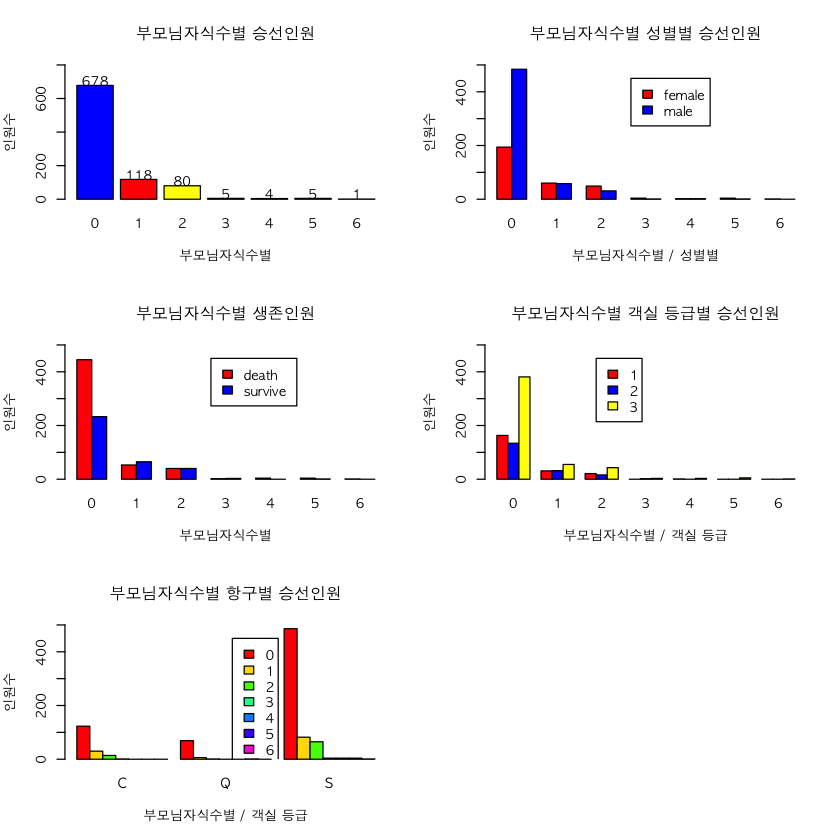

In [464]:
# 그래프 한눈에 보기
par(mfrow = c(3,2))
par(family = "AppleGothic")
options(warn = -1)

barplot(
        table(train_df$Parch),
        main = "부모님자식수별 승선인원",
        col = c("blue","red","yellow"),
        ylim = c(0,800),
        xlab = "부모님자식수별",
        ylab = "인원수",
        )

for(i in 1:length(table(train_df$Parch)))
    text(1.2*i-0.5,table(train_df$Parch)[i]+30,table(train_df$Parch)[i])
barplot(
        t(table(train_df[c("Parch","Sex")])),
        main = "부모님자식수별 성별별 승선인원",
        beside = T,
        col = c("red","blue"),
        ylim = c(0,500),
        xlab = "부모님자식수별 / 성별별",
        ylab = "인원수",
        )

legend(10,450,
      c("female","male"),
       fill = c("red","blue")
      )

barplot(
        t(table(train_df[c("Parch","Survived")])),
        main = "부모님자식수별 생존인원",
        beside = T,
        col = c("red","blue"),
        ylim = c(0,500),
        xlab = "부모님자식수별",
        ylab = "인원수",
        )
legend(10,450,
       c("death","survive"),
       fill = c("red","blue")
      )

barplot(
        t(table(train_df[c("Parch","Pclass")])),
        main = "부모님자식수별 객실 등급별 승선인원",
        beside = T,
        col = c("red","blue","yellow"),
        ylim = c(0,500),
        xlab = "부모님자식수별 / 객실 등급",
        ylab = "인원수",
        )

legend(10,450,
      c(1,2,3),
       fill = c("red","blue","yellow")
      )

barplot(
        table(train_df[c("Parch","Embarked")]),
        main = "부모님자식수별 항구별 승선인원",
        beside = T,
        col = rainbow(7),
        ylim = c(0,500),
        xlab = "부모님자식수별 / 객실 등급",
        ylab = "인원수",
        )

legend(13,450,
      seq(0,6,1),
       fill =      rainbow(7)
      )

In [569]:
train_df2<- train_df[!is.na(train_df$Age),]

In [570]:
train_df2 <- arrange(train_df2,Survived)

In [571]:
head(train_df2)
tail(train_df2)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S
14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
710,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
711,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
712,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
713,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
714,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [572]:
nrow(train_df2[train_df2$Survived == 1,])
nrow(train_df2[train_df2$Survived == 0,])

[1] 290

[1] 424

In [573]:
# samp <- sample(1:424,134)
# samp
# train_df <- train_df2[-samp,]

In [574]:
head(arrange(train_df2,Survived))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S
14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,,S


In [575]:
train_df2$SexCode[train_df2$Sex == "male"] <- 0
train_df2$SexCode[train_df2$Sex == "female"] <- 1
train_df2$Embarked_C = train_df2$Embarked == "C"
train_df2$Embarked_S = train_df2$Embarked == "S"
train_df2$Embarked_Q = train_df2$Embarked == "Q"


In [576]:
head(train_df2)



PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode,Embarked_C,Embarked_S,Embarked_Q
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0,FALSE,TRUE,FALSE
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0,FALSE,TRUE,FALSE
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0,FALSE,TRUE,FALSE
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,0,FALSE,TRUE,FALSE
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S,0,FALSE,TRUE,FALSE
14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,,S,0,FALSE,TRUE,FALSE


In [577]:
train_df2 <- subset(train_df2, select = - c(Sex,Embarked))

In [578]:
head(train_df2)

PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,SexCode,Embarked_C,Embarked_S,Embarked_Q
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,0,FALSE,TRUE,FALSE
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,0,FALSE,TRUE,FALSE
7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,0,FALSE,TRUE,FALSE
8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,,0,FALSE,TRUE,FALSE
13,0,3,"Saundercock, Mr. William Henry",20,0,0,A/5. 2151,8.0500,,0,FALSE,TRUE,FALSE
14,0,3,"Andersson, Mr. Anders Johan",39,1,5,347082,31.2750,,0,FALSE,TRUE,FALSE


In [579]:
target_col <- c("Survived","Pclass","Age","SexCode","Embarked_C","Embarked_S","Embarked_Q")
head(train_df2[,target_col])

Survived,Pclass,Age,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,22,0,FALSE,TRUE,FALSE
0,3,35,0,FALSE,TRUE,FALSE
0,1,54,0,FALSE,TRUE,FALSE
0,3,2,0,FALSE,TRUE,FALSE
0,3,20,0,FALSE,TRUE,FALSE
0,3,39,0,FALSE,TRUE,FALSE


In [580]:
data_train2 <- train_df2[,target_col]

In [581]:
data_train2$Survived <- factor(data_train2$Survived)

In [582]:
head(data_train2)

Survived,Pclass,Age,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,22,0,FALSE,TRUE,FALSE
0,3,35,0,FALSE,TRUE,FALSE
0,1,54,0,FALSE,TRUE,FALSE
0,3,2,0,FALSE,TRUE,FALSE
0,3,20,0,FALSE,TRUE,FALSE
0,3,39,0,FALSE,TRUE,FALSE


In [583]:
str(data_train2)


'data.frame':	714 obs. of  7 variables:
 $ Survived  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pclass    : int  3 3 1 3 3 3 3 3 3 2 ...
 $ Age       : num  22 35 54 2 20 39 14 2 31 35 ...
 $ SexCode   : num  0 0 0 0 0 0 1 0 1 0 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...


In [584]:
set.seed(1234)
# Sampling
samp <- createDataPartition(data_train2$Survived , p = 0.7 ,list = F)
#학습용
data.train <- data_train2[samp,]
#검증용
data.test <- data_train2[-samp,]

#테스트셋
x <- subset(data.test , select = -Survived)
y <- data.test$Survived



In [585]:
#인공신경망 테스트
ANN <- function(data.tr , data.test , x , y ){
    model.nnet <- nnet(Survived ~. , data = data.tr , size = 3)
    pred <- predict(model.nnet , x , type = "class")
    cat("예측력" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
}

#의사결정 나무 
CTREE <-function(data.tr , data.test , x , y ){
    model.ctree <- ctree(Survived ~ . , data=data.tr)
    pred <- predict(model.ctree , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
}

#RandomForesst
RandomForest<-function(data.tr , data.test , x , y ){
    model.rf <- randomForest(Survived ~ . , data=data.tr, ntree = 100)
    pred <- predict(model.rf , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
} 

#SVM
SVM <-function(data.tr , data.test , x , y ){
    model.svm <- svm(Survived ~ . , data=data.tr)
    pred <- predict(model.svm , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
} 

#Logistic regression
Logisticreg <-function(data.tr , data.test , x , y ){
    model.log <- multinom(Survived ~ . , data=data.tr)
    pred <- predict(model.log , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
} 

In [589]:
a <- rep(0,5)
iteration <- 5
for(i in 1:iteration){
    
    a = a + c(
            ANN(data.train , data.test , x , y ),
            CTREE(data.train , data.test , x , y ),
            RandomForest(data.train , data.test , x , y ),
            SVM(data.train , data.test , x , y ),
            Logisticreg(data.train , data.test , x , y )
    )
    
}
a<- a/iteration
result<-data.frame(예측력 = a)
rownames(result) = c("인공신경망","의사결정나무","RandomForest","SVM","로지스틱회귀분석")
result

# weights:  25
initial  value 399.499765 
iter  10 value 283.853882
iter  20 value 218.727951
iter  30 value 216.546139
iter  40 value 213.580787
iter  50 value 210.536231
iter  60 value 209.408859
iter  70 value 208.391563
iter  80 value 207.984044
iter  90 value 206.611789
iter 100 value 206.570445
final  value 206.570445 
stopped after 100 iterations
예측력 0.8411215 입니다.    y
pred   0   1
   0 120  27
   1   7  60
예측력 0.7990654 입니다.    y
pred   0   1
   0 120  36
   1   7  51
예측력 0.8411215 입니다.    y
pred   0   1
   0 125  32
   1   2  55
예측력 0.7897196 입니다.    y
pred   0   1
   0 107  25
   1  20  62
# weights:  8 (7 variable)
initial  value 346.573590 
iter  10 value 226.214759
final  value 226.189417 
converged
예측력 0.8037383 입니다.    y
pred   0   1
   0 106  21
   1  21  66
# weights:  25
initial  value 350.158855 
iter  10 value 297.012693
iter  20 value 214.181144
iter  30 value 209.154426
iter  40 value 208.467456
iter  50 value 208.392635
iter  60 value 208.382551
final  value 208

,예측력
인공신경망,0.8308411
의사결정나무,0.7990654
RandomForest,0.8233645
SVM,0.7897196
로지스틱회귀분석,0.8037383


In [597]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


In [592]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...


In [595]:
str(data.train)

'data.frame':	500 obs. of  7 variables:
 $ Survived  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pclass    : int  3 3 3 2 1 1 3 3 2 3 ...
 $ Age       : num  35 2 39 35 19 28 21 40 27 7 ...
 $ SexCode   : num  0 0 0 0 0 0 0 1 1 0 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE TRUE ...
 $ Embarked_S: logi  TRUE TRUE TRUE TRUE TRUE FALSE ...
 $ Embarked_Q: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...


In [601]:
train_df3 <- train_df

In [606]:
train_df3$Sex == j & train_df3$Pclass == i

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[613] FALSE FALSE FALSE 

In [611]:
for( j in c("female","male")){
    for (i in 1:3){

        train_df3 <- cbind(train_df3,cat = train_df3$Sex == j & train_df3$Pclass == i)
        colnames(train_df3)[ncol(train_df3)] <- paste(substring(j,1,1),i, sep = "")
    }
}

In [612]:
head(train_df3)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,f1,f2,f3,m1,m2,m3
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
